<a href="https://colab.research.google.com/github/amanjaiswalofficial/machine-learning-engineer-projects/blob/main/02_end2end_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data collection

Shape of the dataset: (506, 14)

Columns in the dataset: Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

Sample records:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio       b  lstat  medv
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7  396.90   5.33  36.2

Summary statistics:
             crim          zn       indus  ...           b       lstat        medv
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     

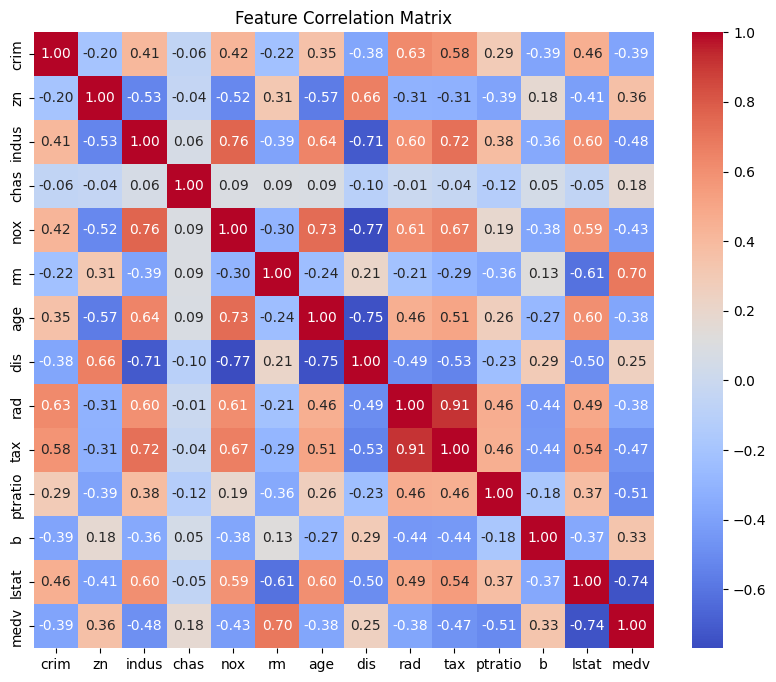

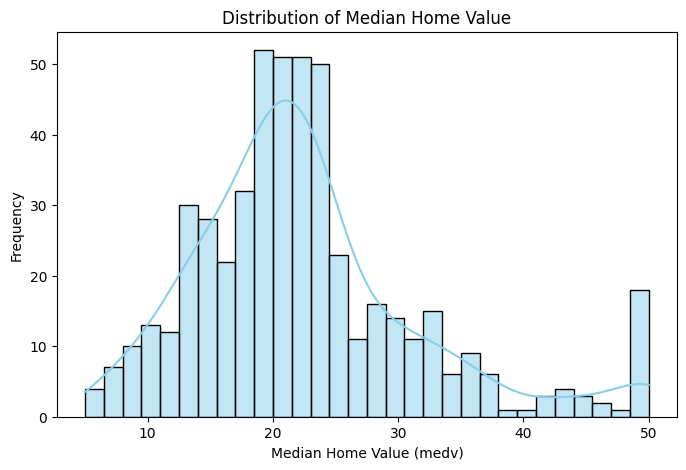

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

# Preview the dataset
print("Shape of the dataset:", data.shape)
print("\nColumns in the dataset:", data.columns)
print("\nSample records:")
print(data.head())

# Summary statistics
print("\nSummary statistics:")
print(data.describe())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Basic EDA: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

# Distribution of the target variable (medv - median home value)
plt.figure(figsize=(8, 5))
sns.histplot(data['medv'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Median Home Value")
plt.xlabel("Median Home Value (medv)")
plt.ylabel("Frequency")
plt.show()

### Data cleaning and preparation

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

data = data.drop(["tax", "rad"], axis=1)
X = data.drop("medv", axis=1)
y = data["medv"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFirst 5 rows of scaled training data:")
print(pd.DataFrame(X_train_scaled, columns=X.columns).head())

Training set size: (404, 11), Testing set size: (102, 11)

First 5 rows of scaled training data:
       crim        zn     indus      chas  ...       dis   ptratio         b     lstat
0  1.287702 -0.500320  1.033237 -0.278089  ... -0.802173  0.845343 -0.074337  1.753505
1 -0.336384 -0.500320 -0.413160 -0.278089  ...  0.324349  1.204741  0.430184 -0.561474
2 -0.403253  1.013271 -0.715218 -0.278089  ...  1.330697 -0.637176  0.065297 -0.651595
3  0.388230 -0.500320  1.033237 -0.278089  ... -0.839240  0.845343 -3.868193  1.525387
4 -0.325282 -0.500320 -0.413160 -0.278089  ... -0.005494  1.204741  0.379119 -0.165787

[5 rows x 11 columns]


### Model training and evaluation

In [5]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

y_pred_lr = linear_model.predict(X_test_scaled)
print(f"R2 Score {r2_score(y_test, y_pred_lr)}, MSE: {mean_squared_error(y_test, y_pred_lr)}")

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_model.predict(X_test_scaled)
print(f"R2 Score: {r2_score(y_test, y_pred_lasso)}, MSE: {mean_squared_error(y_test, y_pred_lasso)}")

R2 Score 0.6386537059259132, MSE: 26.49889077541537
R2 Score: 0.6380055905075017, MSE: 26.546419530972024


### Model validation and Hyperparameter tuning

In [6]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# CV for LR
cv_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Linear Regression CV R2 score: {cv_scores}, \
        Mean CV R2 Score: {cv_scores.mean()}")

# Hyperparameter tuning for LassoR
lasso_params = {"alpha": [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_params, scoring='r2', cv=5)
lasso_grid.fit(X_train_scaled, y_train)

# Finding the best lasso model
best_lasso = lasso_grid.best_estimator_
print(f"Best lasso parameters: {lasso_grid.best_params_}")
print(f"Best CV R2 Score: {lasso_grid.best_score_}")

# Using it to predict
y_pred_tuned_lasso = best_lasso.predict(X_test_scaled)
print(f"Tuned Lasso R Performance, R2 Score: {r2_score(y_test, y_pred_tuned_lasso)}, MSE: {mean_squared_error(y_test, y_pred_tuned_lasso)}")

Linear Regression CV R2 score: [0.75931296 0.61694551 0.74253156 0.80159752 0.66173846],         Mean CV R2 Score: 0.7164252030270664
Best lasso parameters: {'alpha': 0.01}
Best CV R2 Score: 0.7164938195337495
Tuned Lasso R Performance, R2 Score: 0.6387358492561634, MSE: 26.492866894246735


### Model evaluation

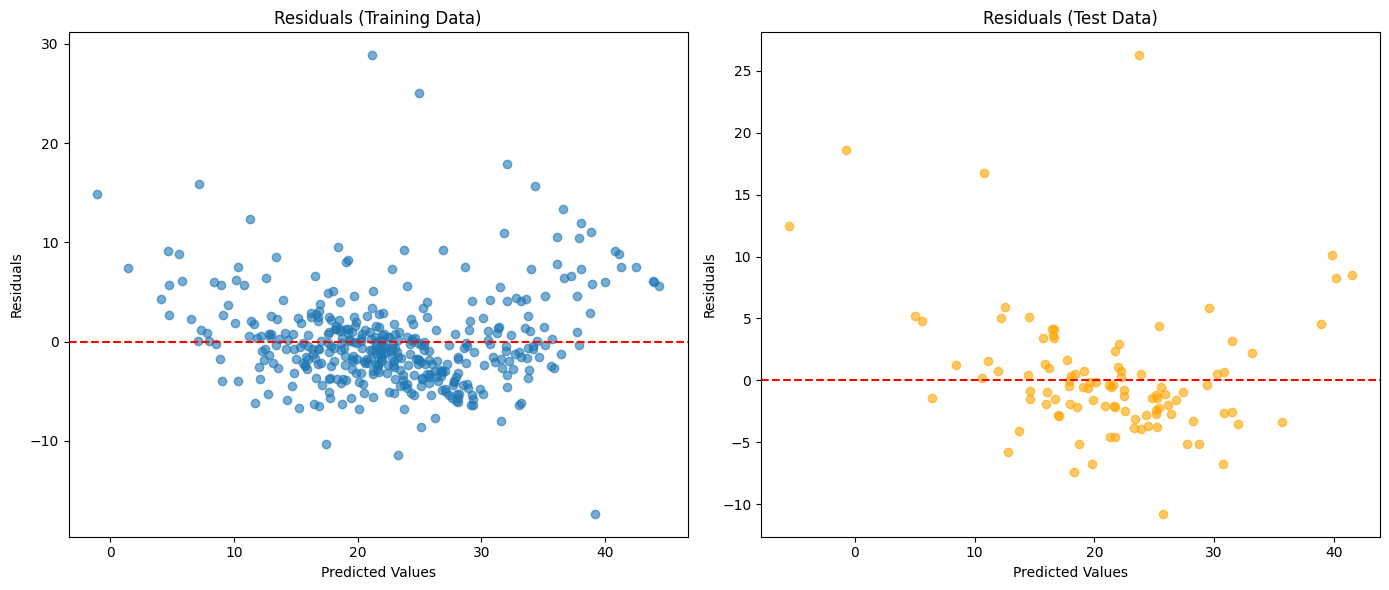

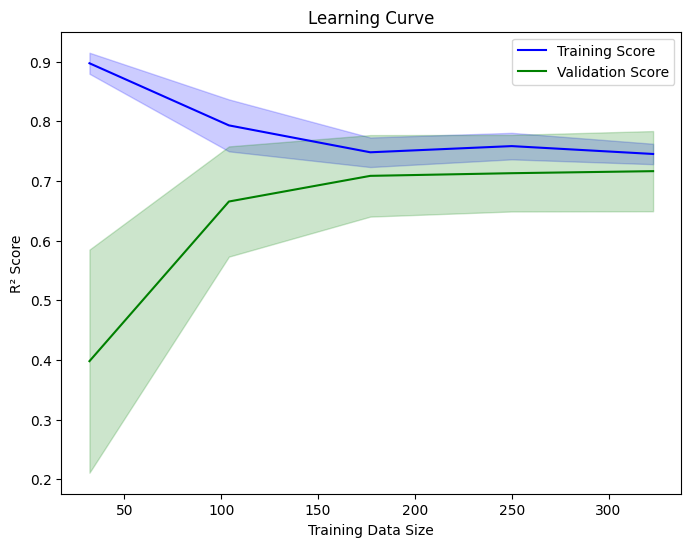

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

y_train_pred = best_lasso.predict(X_train_scaled)
y_test_pred = best_lasso.predict(X_test_scaled)

residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, residuals_train, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals (Training Data)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, residuals_test, alpha=0.6, color='orange')
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals (Test Data)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

train_sizes, train_scores, test_scores = learning_curve(best_lasso, X_train_scaled, y_train, cv=5, scoring='r2', n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.fill_between(
    train_sizes,
    train_mean - train_std,
    train_mean + train_std,
    color="blue",
    alpha=0.2,
)
plt.plot(train_sizes, test_mean, label="Validation Score", color="green")
plt.fill_between(
    train_sizes,
    test_mean - test_std,
    test_mean + test_std,
    color="green",
    alpha=0.2,
)
plt.title("Learning Curve")
plt.xlabel("Training Data Size")
plt.ylabel("R² Score")
plt.legend()
plt.show()


### Model deployment

In [8]:
import pickle

import os
os.makedirs("models", exist_ok=True)

with open("models/linear_regression.pkl", "wb") as f:
    pickle.dump(linear_model, f)

with open("models/lasso_regression.pkl", "wb") as f:
    pickle.dump(lasso_model, f)

print("Models saved successfully!")

Models saved successfully!


In [ ]:
!pip install skl2onnx onnxruntime

In [10]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

input_shape = FloatTensorType([None, X_train.shape[1]])

linear_onnx = convert_sklearn(linear_model, initial_types=[("input", input_shape)])
with open("models/linear_regression.onnx", "wb") as f:
  f.write(linear_onnx.SerializeToString())

lasso_onnx = convert_sklearn(lasso_model, initial_types=[("input", input_shape)])
with open("models/lasso_regression.onnx", "wb") as f:
  f.write(lasso_onnx.SerializeToString())

print("Models converted to ONNX format!")

Models converted to ONNX format!
